# Text to Time Series Encoding

This notebook displays how text data can be visualized as time-series data.  To do so, we simply encode each word by its frequency (with ties broken arbitrarily) and scale by the number of unique word occurences.  This assigns each word occuring in the targeted text a unique number $w\in(-1,1]$.

The purpose of such a demonstration is that we wish to reverse this process for feature extraction; in a sense, the goal is to transform time-series data into data analogous to text data. 

In [1]:
# Modules
import string
import collections
import matplotlib.pyplot as plt
import numpy as np

# Utility function
space_list = ['.',',','!','?',':',';','/','(',')','-', '\"', '\'s']
remove_list = ['\n']

def format_string(string):
    global space_list
    global remove_list
    for item in space_list:
        string = string.replace(item, " " + item + " ")
    for item in remove_list:
        string = string.replace(item, " ")
    return string.lower()

# Text to Time Series
# Input: .txt filename (assumed in current working directory)
class text_to_time_series:
    
    def __init__(self, 
                 filename, 
                 encoding = 'parity'):
        self.encoding = encoding
        self.filename = filename
        with open(self.filename, 'r') as file:
            self.text = file.read()

    def encode(self):
        formatted_string = format_string(self.text)
        self.words_list = formatted_string.split()
        frequency_dictionary = collections.Counter(self.words_list)
        dictionary = dict()
        for word, _ in frequency_dictionary.most_common():
            dictionary[word] = len(dictionary)
        self.encoder = dict()
        denominator = len(dictionary)
        if self.encoding == 'parity':
            denominator = 2 * denominator
            for key in dictionary.keys():
                if dictionary[key] % 2 == 0:
                    value = (.5 * dictionary[key]) / denominator
                else:
                    value = - (.5 * dictionary[key]) / denominator
                self.encoder[key] = value
        else:
            for key in dictionary.keys():
                self.encoder[key] = dictionary[key] / denominator
        self.decoder = dict(zip(dict(self.encoder).values(), dict(self.encoder).keys()))
    
    def get_encoder(self):
        return self.encoder
    
    def get_decoder(self):
        return self.decoder
    
    def show(self, start, stop):
        encoded = [self.encoder[word] for word in self.words_list[start - 1 : stop - 1]]
        plt.figure(figsize = (20,10))
        plt.plot(encoded, color = 'b', label = self.encoding + ' encoding')
        plt.legend()
        plt.title('Word %d to %d of %s'%(start, stop, self.filename))
        plt.show()

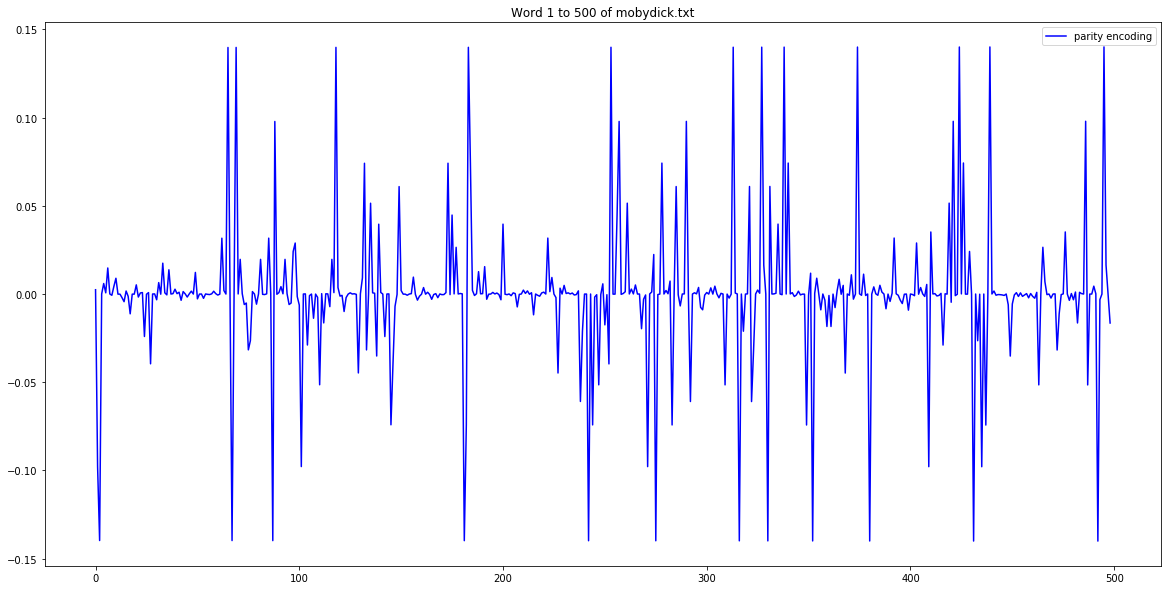

In [2]:
parity_TTTS = text_to_time_series('mobydick.txt')
parity_TTTS.encode()
parity_TTTS.show(1,500)

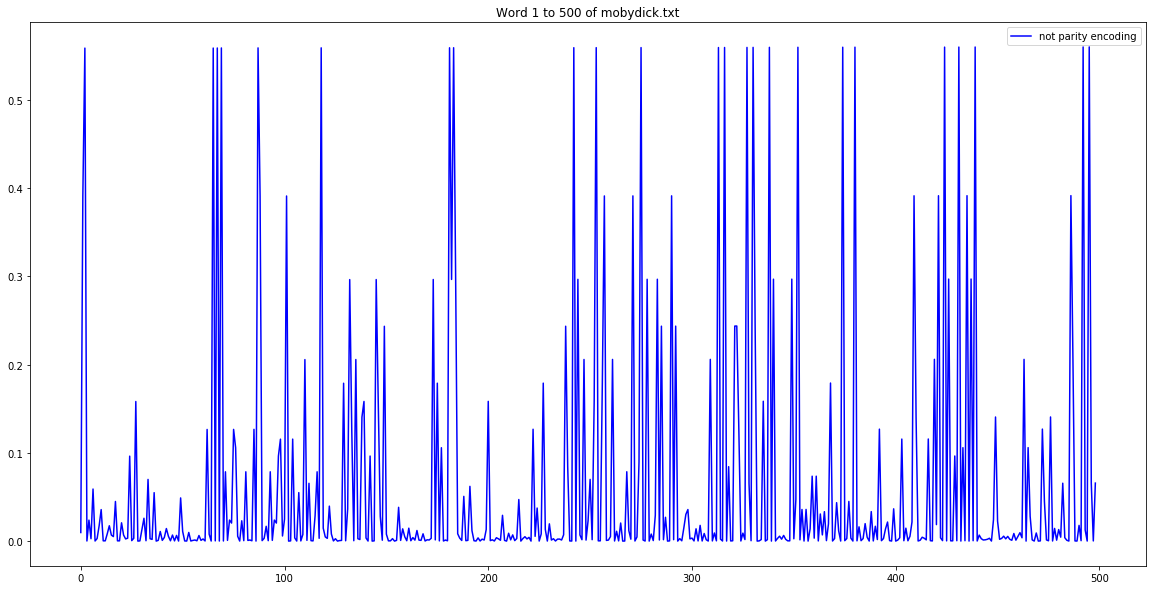

In [3]:
positive_TTTS =  text_to_time_series('mobydick.txt', encoding = 'not parity')
positive_TTTS.encode()
positive_TTTS.show(1,500)